# Data preparation
The data preparation step consists of two parts. Firstly, unstructured training and evaluation data has to be collected for the unsupervised finetuning step. Secondly, structured training and evaluation data has to be developed for the supervised finetuning step.

## Unstructured Data
The unstructured data consists of unstructured training data and unstructured evaluation data which is further classified into BPM- and BPMN-related data as the primary objective of the unstructured dataset is to enhance the knowledge base of the new Large Language Model (LLM) with regard to Business Process Management (BPM) in a broad context and Business Process Modeling and Notation (BPMN) in a more specific context. Therefore, the data was collected by conducting targeted keyword searches for "Business Process Management" and "Business Process Modeling and Notation" across prominent search engines including Google, Google Scholar, and different Online Libraries. These documents were subsequently retrieved in PDF format and then converted into TXT files employing the PDFgear software. Following this conversion, the TXT files underwent a manual cleaning process, involving the removal of extraneous elements such as empty lines, table of contents, and references that held no relevance to our designated Use Case. Lastly, the database was reduced to the relevant documents with a positive impact on the knowledge of the model. The impact of a document was determined in a perplexity evaluation. This led us to the following documents:

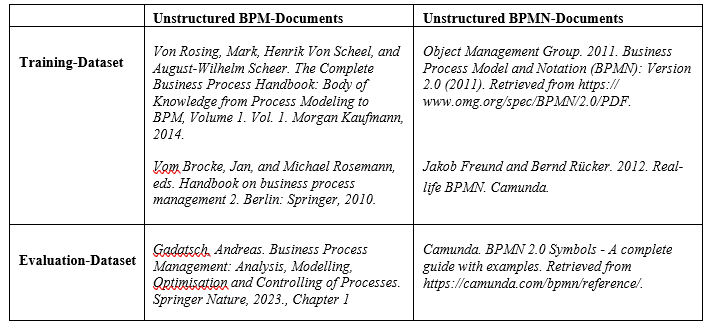

The training documents were stored in the folder "/home/[...]/text-generation-webui/training/datasets/Unstructured_training_data" and the evaluation documents respectively the BPM_Evaluation_dataset and BPMN_Evaluation_dataset were stored in the folder "/home/[...]/text-generation-webui/training/datasets" so that they can be accessed from the text-generation-webui.
   
## Structured Data
The principal aim of the structured dataset is to enhance the model's proficiency in comprehending BPMN-Notation and elucidating processes articulated in BPMN-Notation using natural language. To achieve this, we meticulously crafted an instruction dataset in the alpaca-format. This instruction dataset is organized into three key columns: "Instruction", "Input", and "Output". The "Instruction" column features example prompts that can be presented to a large language model, providing guidance for model responses. The "Input" column contains supplementary information that complements the instruction prompt, affording the LLM an additional contextual reference. Typically, based on the content of the "Instruction" and "Input" columns, the LLM should generate a response. However, in the Instruction-Dataset an example-answer is already provided in the “output” column. This approach facilitates the LLM's learning process, allowing it to discern the expected responses based on the contents of the "Instruction" and "Input" columns. In our Instruction-Dataset, diverse prompt commands are employed in the "Instruction" column, such as "What does this symbol mean?" or "Please summarize the following process." In the "Input" column, raw XML code representing symbols or processes in BPMN-Notation is provided to the model. The corresponding response in the "Output" column is meticulously crafted to ensure ease of comprehension, avoiding the inclusion of technical names or IDs, with a preference for clarity in simple language. Consequently, we classify our example instructions into three complexity level of BPMN understanding:

**Level 1: Basic understanding of individual BPMN-Symbols in XML-Code**
In the first level of complexity, we introduce the LLM to the XML code of single BPMN symbols via the "Input" column, instructing it to elucidate the meaning of these symbols through the "Instruction" column. The "Output" column furnishes concise, natural language explanations akin to those found in the unstructured dataset's symbol explanations. This category aims to ensure that the LLM recognizes the XML code of each BPMN symbol and comprehends the association between XML code and the symbolic meaning. For example, the LLM should proficiently recognize the XML code of a parallel gateway and provide an accurate explanation of its function. In total, 97 symbols are provided to the LLM in the training dataset.

**Level 2: Simple Understanding of combinations of BPMN-Symbols in XML-Code** 
In the second level of complexity, the LLM is presented with XML code representing basic combinations of symbols in BPMN-Notation via the "Input" column. Activities within these combinations are denoted generically, such as "Activity 1" and "Activity 2," rather than using specific activity names. The "Instruction" column prompts the LLM to either summarize the code snippet or to respond to logical questions about it. For instance, a logical question could inquire, "Can Activity 1 occur before Activity 2?" The "Output" column provides accurate example answers in natural language. This category aims to ensure that the LLM not only learns the meaning of individual symbols but also comprehends how symbols interact within combinations. This understanding extends beyond the mere identification of symbols, allowing the LLM for example to explain that activities connected via a parallel gateway occur concurrently rather than sequentially. In total, 31 different symbol combinations are presented to the LLM in the training dataset, with each combination being used for both summarization and logical question prompts.

**Level 3: Advanced Understanding of entire processes in BPMN-Notation via the XML-Code** 
In the third and highest level of complexity, the LLM encounters complete BPMN processes represented in XML code via the "Input" column. Similar to the Level 2 complexity, the "Instruction" column prompts the LLM to either summarize the entire process or to respond to logical questions about it. The "Output" column provides as well exemplary answers in natural language. This category aims to simulate real-world scenarios by posing questions related to actual processes, ensuring that the LLM not only grasps the interplay of different symbols but also expresses this understanding naturally, using the correct symbol names. For instance, the LLM should adeptly articulate that activities such as "Issue Invoice" and "Ship Order" occur concurrently in the Order-to-Cash process. In total, ten distinct processes are presented to the LLM in the training dataset, with each process being used twice for summarization prompts and eight times for various logical questions.

A comprehensive example of the Instruction-Dataset, featuring instances from all three complexity levels, can be found in the following table. 

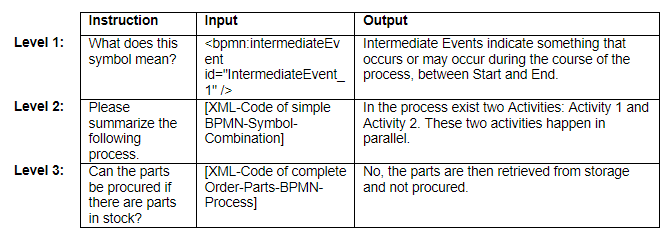

In addition to the instruction training dataset an instruction evaluation dataset was meticulously crafted, bearing identical columns and adhering to the same categorization as the aforementioned instruction training dataset. However, the instruction evaluation dataset comprises a smaller scale, amounting to only 20% of the training dataset's volume. The instruction training dataset as well as the instruction evaluation dataset are stored in the folder "/home/[...]/text-generation-webui/training/datasets" under the names Structured_training_dataset.json and Structured_evaluation_dataset.json. Lastly, an empty JSON-document was developed that enables the loss evaluation of different models. This empty document is stored as well in the folder "/home/[...]/text-generation-webui/training/datasets" under the name Structured_empty_dataset.json.
